#👩‍💻**Telecom X: Análisis y Predicción de Evasion de Clientes**

##Introduccion

📌 Descripción del problema

Telecom X presenta una tasa elevada de cancelación de clientes (churn), lo cual afecta negativamente su rentabilidad y su capacidad de crecimiento. Actualmente no se han identificado con claridad los factores que llevan a los clientes a abandonar el servicio. Esta falta de conocimiento limita la capacidad de la empresa para diseñar e implementar estrategias de retención eficaces y proactivas, provocando una pérdida sostenida de la base de clientes.

📌 Objetivo principal del proyecto

Detectar a los clientes con mayor probabilidad de abandonar el servicio y reducir esa tasa de cancelación mediante intervenciones preventivas y focalizadas.

📌 Objetivo de Ciencia de Datos

Este problema se aborda como una tarea de clasificación binaria: predecir si un cliente abandona (Churn = 1 / “sí”) o permanece (Churn = 0 / “no”). La meta es construir un modelo predictivo que clasifique a los clientes en estas dos categorías. Para lograrlo se llevará a cabo:
 * Un proceso ETL (extracción, transformación y carga) sobre el dataset para asegurar calidad y consistencia.
 * Una exploración descriptiva (EDA) que permita entender patrones, relaciones y variables predictoras relevantes.

##📌 Extracción

###Importacion de librerias

In [327]:
import pandas as pd
import requests

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###Extracción de datos

In [328]:
#✅ Cargar los datos directamente desde la API utilizando Python.
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

#✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [329]:
df_normalizado = pd.json_normalize(data)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [330]:
df_normalizado.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3353,4660-IRIBM,No,Male,0,Yes,Yes,18,Yes,No,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,87.90,1500.5
5230,7134-HBPBS,No,Female,1,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.10,7774.05
3283,4578-PHJYZ,No,Male,0,Yes,Yes,52,Yes,No,DSL,...,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,68.75,3482.85
7190,9889-TMAHG,Yes,Male,1,No,No,8,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),100.30,832.35
6499,8932-CZHRQ,No,Male,0,No,No,68,Yes,Yes,DSL,...,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),76.75,5233.25
2081,2927-QRRQV,No,Male,0,Yes,No,46,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,One year,Yes,Electronic check,94.65,4312.5
2522,3521-MNKLV,No,Male,0,No,No,24,Yes,No,DSL,...,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.8
4125,5651-WYIPH,No,Female,1,No,No,18,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.85,865.75
1900,2685-SREOM,Yes,Female,0,Yes,Yes,25,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,89.10,2368.4
2616,3646-ITDGM,No,Female,0,No,No,56,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,1051.9


In [331]:
#✅ Explorar las columnas del dataset y verificar sus tipos de datos.
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

✅ Consultar el diccionario para comprender mejor el significado de las variables.

**Diccionario de datos**
*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

##🔧 Transformación

###**Comprobación de incoherencias en los datos**

In [332]:
# Verifique si hay valores únicos en cada columna
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df_normalizado[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

###Manejo de inconsistencias

*   Duplicados
*   Valores vacíos
*   Valores nulos
*   Tipos de datos
*   Valores atípicos
*   Consistencia y validez de datos categóricos
*   Normalización de textos

In [333]:
#Verificar la existencia de datos duplicados
print("Numero de datos duplicados:", df_normalizado.duplicated().sum())

Numero de datos duplicados: 0


In [334]:
#Verificar la existencia de datos nulos
valores_nulos = df_normalizado.isnull().sum()
print("Valores nulos por columna:", valores_nulos)

Valores nulos por columna: customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [335]:
# Verificar la existencia de celdas vacias o en blanco
valores_en_blanco_o_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o string vacios por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


In [336]:
# Tipo de datos
df_normalizado.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [337]:
#Manejo de inconsistencias(Valores en blanco o string vacios) en la columna "Churn"
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_normalizado))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [338]:
#Manejo de inconsistencias, cambiando la columna "account.Charges.Total" a Float
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print('Tipo de datos después de la conversión:',df_normalizado['account.Charges.Total'].dtypes)

Tipo de datos después de la conversión: float64


In [339]:
# Verificar el manejo de inconsistencias de celdas vacias o en blanco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


**Columna de cuentas diarias**

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [340]:
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
df_normalizado[['Cuentas_Diarias','account.Charges.Monthly']]

,Cuentas_Diarias,account.Charges.Monthly
0,2.186667,65.60
1,1.996667,59.90
2,2.463333,73.90
3,3.266667,98.00
4,2.796667,83.90
...,...,...
7262,1.838333,55.15
7263,2.836667,85.10
7264,1.676667,50.30
7265,2.261667,67.85


###Estandarización y transformación de datos

La estandarización y transformación de datos es una etapa altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis.

Durante esta fase, covertimos los valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

####Conversion de valores textuales

In [341]:
df_normalizado['Churn'] = df_normalizado['Churn'].map({'Yes': 1, 'No': 0})
df_normalizado['customer.Partner'] = df_normalizado['customer.Partner'].map({'Yes': 1, 'No': 0})
df_normalizado['customer.Dependents'] = df_normalizado['customer.Dependents'].map({'Yes': 1, 'No': 0})
df_normalizado['phone.PhoneService'] = df_normalizado['phone.PhoneService'].map({'Yes': 1, 'No': 0})
df_normalizado['account.PaperlessBilling'] = df_normalizado['account.PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [342]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

####Renombrar columnas

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Esto mejora significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

**Diccionario de datos**
*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
*   gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

In [343]:
df_normalizado = df_normalizado.rename(columns={'customerID': 'ID_Cliente', 'Churn': 'Evasión', 'customer.gender':'Género', 'customer.SeniorCitizen':'Ciudadano_Mayor',
                               'customer.Partner':'Pareja', 'customer.Dependents':'Dependientes', 'customer.tenure':'Meses_Contrato',
                               'phone.PhoneService':'Servicio_Telefónico', 'phone.MultipleLines':'MúltiplesLíneas_Telefónicas', 'internet.InternetService':'Servicio_Internet',
                               'internet.OnlineSecurity':'SeguridadEnLínea_Internet', 'internet.OnlineBackup':'CopiaDeSeguridadEnLínea_Internet',
                               'internet.DeviceProtection':'SeguridadAdicional_Internet', 'internet.TechSupport':'SoporteTécnico_Internet',
                               'internet.StreamingTV':'Transmisión_TV', 'internet.StreamingMovies':'Transmisión_Películas', 'account.Contract':'Tipo_Contrato',
                               'account.PaperlessBilling':'Factura_Online', 'account.PaymentMethod':'Forma_Pago',
                               'account.Charges.Monthly':'Cuentas_Mensuales', 'account.Charges.Total':'Cuentas_Totales'})

In [344]:
df_normalizado.columns

Index(['ID_Cliente', 'Evasión', 'Género', 'Ciudadano_Mayor', 'Pareja',
       'Dependientes', 'Meses_Contrato', 'Servicio_Telefónico',
       'MúltiplesLíneas_Telefónicas', 'Servicio_Internet',
       'SeguridadEnLínea_Internet', 'CopiaDeSeguridadEnLínea_Internet',
       'SeguridadAdicional_Internet', 'SoporteTécnico_Internet',
       'Transmisión_TV', 'Transmisión_Películas', 'Tipo_Contrato',
       'Factura_Online', 'Forma_Pago', 'Cuentas_Mensuales', 'Cuentas_Totales',
       'Cuentas_Diarias'],
      dtype='object')

In [345]:
df_normalizado.head()

,ID_Cliente,Evasión,Género,Ciudadano_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefónico,MúltiplesLíneas_Telefónicas,Servicio_Internet,...,SeguridadAdicional_Internet,SoporteTécnico_Internet,Transmisión_TV,Transmisión_Películas,Tipo_Contrato,Factura_Online,Forma_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


##📊 Carga y análisis

###Análisis Descriptivo

✅Calculando métricas como media, mediana, desviación estándar y otras medidas que nos ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [346]:
df_normalizado.describe()

,Evasión,Ciudadano_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefónico,Factura_Online,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [347]:
valores_nulos = df_normalizado.isnull().sum()
print("Valores nulos por columna:", valores_nulos)

Valores nulos por columna: ID_Cliente                           0
Evasión                              0
Género                               0
Ciudadano_Mayor                      0
Pareja                               0
Dependientes                         0
Meses_Contrato                       0
Servicio_Telefónico                  0
MúltiplesLíneas_Telefónicas          0
Servicio_Internet                    0
SeguridadEnLínea_Internet            0
CopiaDeSeguridadEnLínea_Internet     0
SeguridadAdicional_Internet          0
SoporteTécnico_Internet              0
Transmisión_TV                       0
Transmisión_Películas                0
Tipo_Contrato                        0
Factura_Online                       0
Forma_Pago                           0
Cuentas_Mensuales                    0
Cuentas_Totales                     11
Cuentas_Diarias                      0
dtype: int64


In [348]:
df_actual = df_normalizado.dropna()
print("Número de filas después de eliminar los valores nulos:", len(df_clean))

Número de filas después de eliminar los valores nulos: 7032


In [349]:
valores_nulos = df_actual.isnull().sum()
print("Valores nulos por columna:", valores_nulos)

Valores nulos por columna: ID_Cliente                          0
Evasión                             0
Género                              0
Ciudadano_Mayor                     0
Pareja                              0
Dependientes                        0
Meses_Contrato                      0
Servicio_Telefónico                 0
MúltiplesLíneas_Telefónicas         0
Servicio_Internet                   0
SeguridadEnLínea_Internet           0
CopiaDeSeguridadEnLínea_Internet    0
SeguridadAdicional_Internet         0
SoporteTécnico_Internet             0
Transmisión_TV                      0
Transmisión_Películas               0
Tipo_Contrato                       0
Factura_Online                      0
Forma_Pago                          0
Cuentas_Mensuales                   0
Cuentas_Totales                     0
Cuentas_Diarias                     0
dtype: int64


In [350]:
df_actual

,ID_Cliente,Evasión,Género,Ciudadano_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefónico,MúltiplesLíneas_Telefónicas,Servicio_Internet,...,SeguridadAdicional_Internet,SoporteTécnico_Internet,Transmisión_TV,Transmisión_Películas,Tipo_Contrato,Factura_Online,Forma_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


###Distribución de evasión

In [351]:
#Realizar un transformacion para poder interpretar mas facilmente los graficos
df_actual['Evasión'] = df_actual['Evasión'].map({0:'No',1:'Si'})

/tmp/ipython-input-851108281.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [352]:
df_actual.head()

,ID_Cliente,Evasión,Género,Ciudadano_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefónico,MúltiplesLíneas_Telefónicas,Servicio_Internet,...,SeguridadAdicional_Internet,SoporteTécnico_Internet,Transmisión_TV,Transmisión_Películas,Tipo_Contrato,Factura_Online,Forma_Pago,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Si,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


Visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [353]:
fig = px.pie(df_actual, names='Evasión', title='Proporción de clientes que permanecieron y los que se dieron de baja')
fig.update_traces(dict(legendgroup='Evasión', showlegend=True,
                       hovertemplate='%{label}: %{value} (%{percent})',
                       textinfo='percent+label', pull=[0, 0.1]),
                  selector=dict(type='pie'))

fig.update_layout(width=800, height=500)
fig.show()

###Recuento de evasión por variables categóricas

In [354]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID_Cliente                        7032 non-null   object 
 1   Evasión                           7032 non-null   object 
 2   Género                            7032 non-null   object 
 3   Ciudadano_Mayor                   7032 non-null   int64  
 4   Pareja                            7032 non-null   int64  
 5   Dependientes                      7032 non-null   int64  
 6   Meses_Contrato                    7032 non-null   int64  
 7   Servicio_Telefónico               7032 non-null   int64  
 8   MúltiplesLíneas_Telefónicas       7032 non-null   object 
 9   Servicio_Internet                 7032 non-null   object 
 10  SeguridadEnLínea_Internet         7032 non-null   object 
 11  CopiaDeSeguridadEnLínea_Internet  7032 non-null   object 
 12  SeguridadAd

In [355]:
# Obtener las columnas con tipo de dato 'object' (generalmente categóricas)
categorical_columns = df_actual.select_dtypes(include='object').columns.tolist()

# Excluir columnas que no son categóricas para el análisis (como ID y la variable objetivo)
columns_to_exclude = ['ID_Cliente','Evasión']
categorical_columns = [col for col in categorical_columns if col not in columns_to_exclude]

print("Columnas categóricas:")
print(categorical_columns)

Columnas categóricas:
['Género', 'MúltiplesLíneas_Telefónicas', 'Servicio_Internet', 'SeguridadEnLínea_Internet', 'CopiaDeSeguridadEnLínea_Internet', 'SeguridadAdicional_Internet', 'SoporteTécnico_Internet', 'Transmisión_TV', 'Transmisión_Películas', 'Tipo_Contrato', 'Forma_Pago']


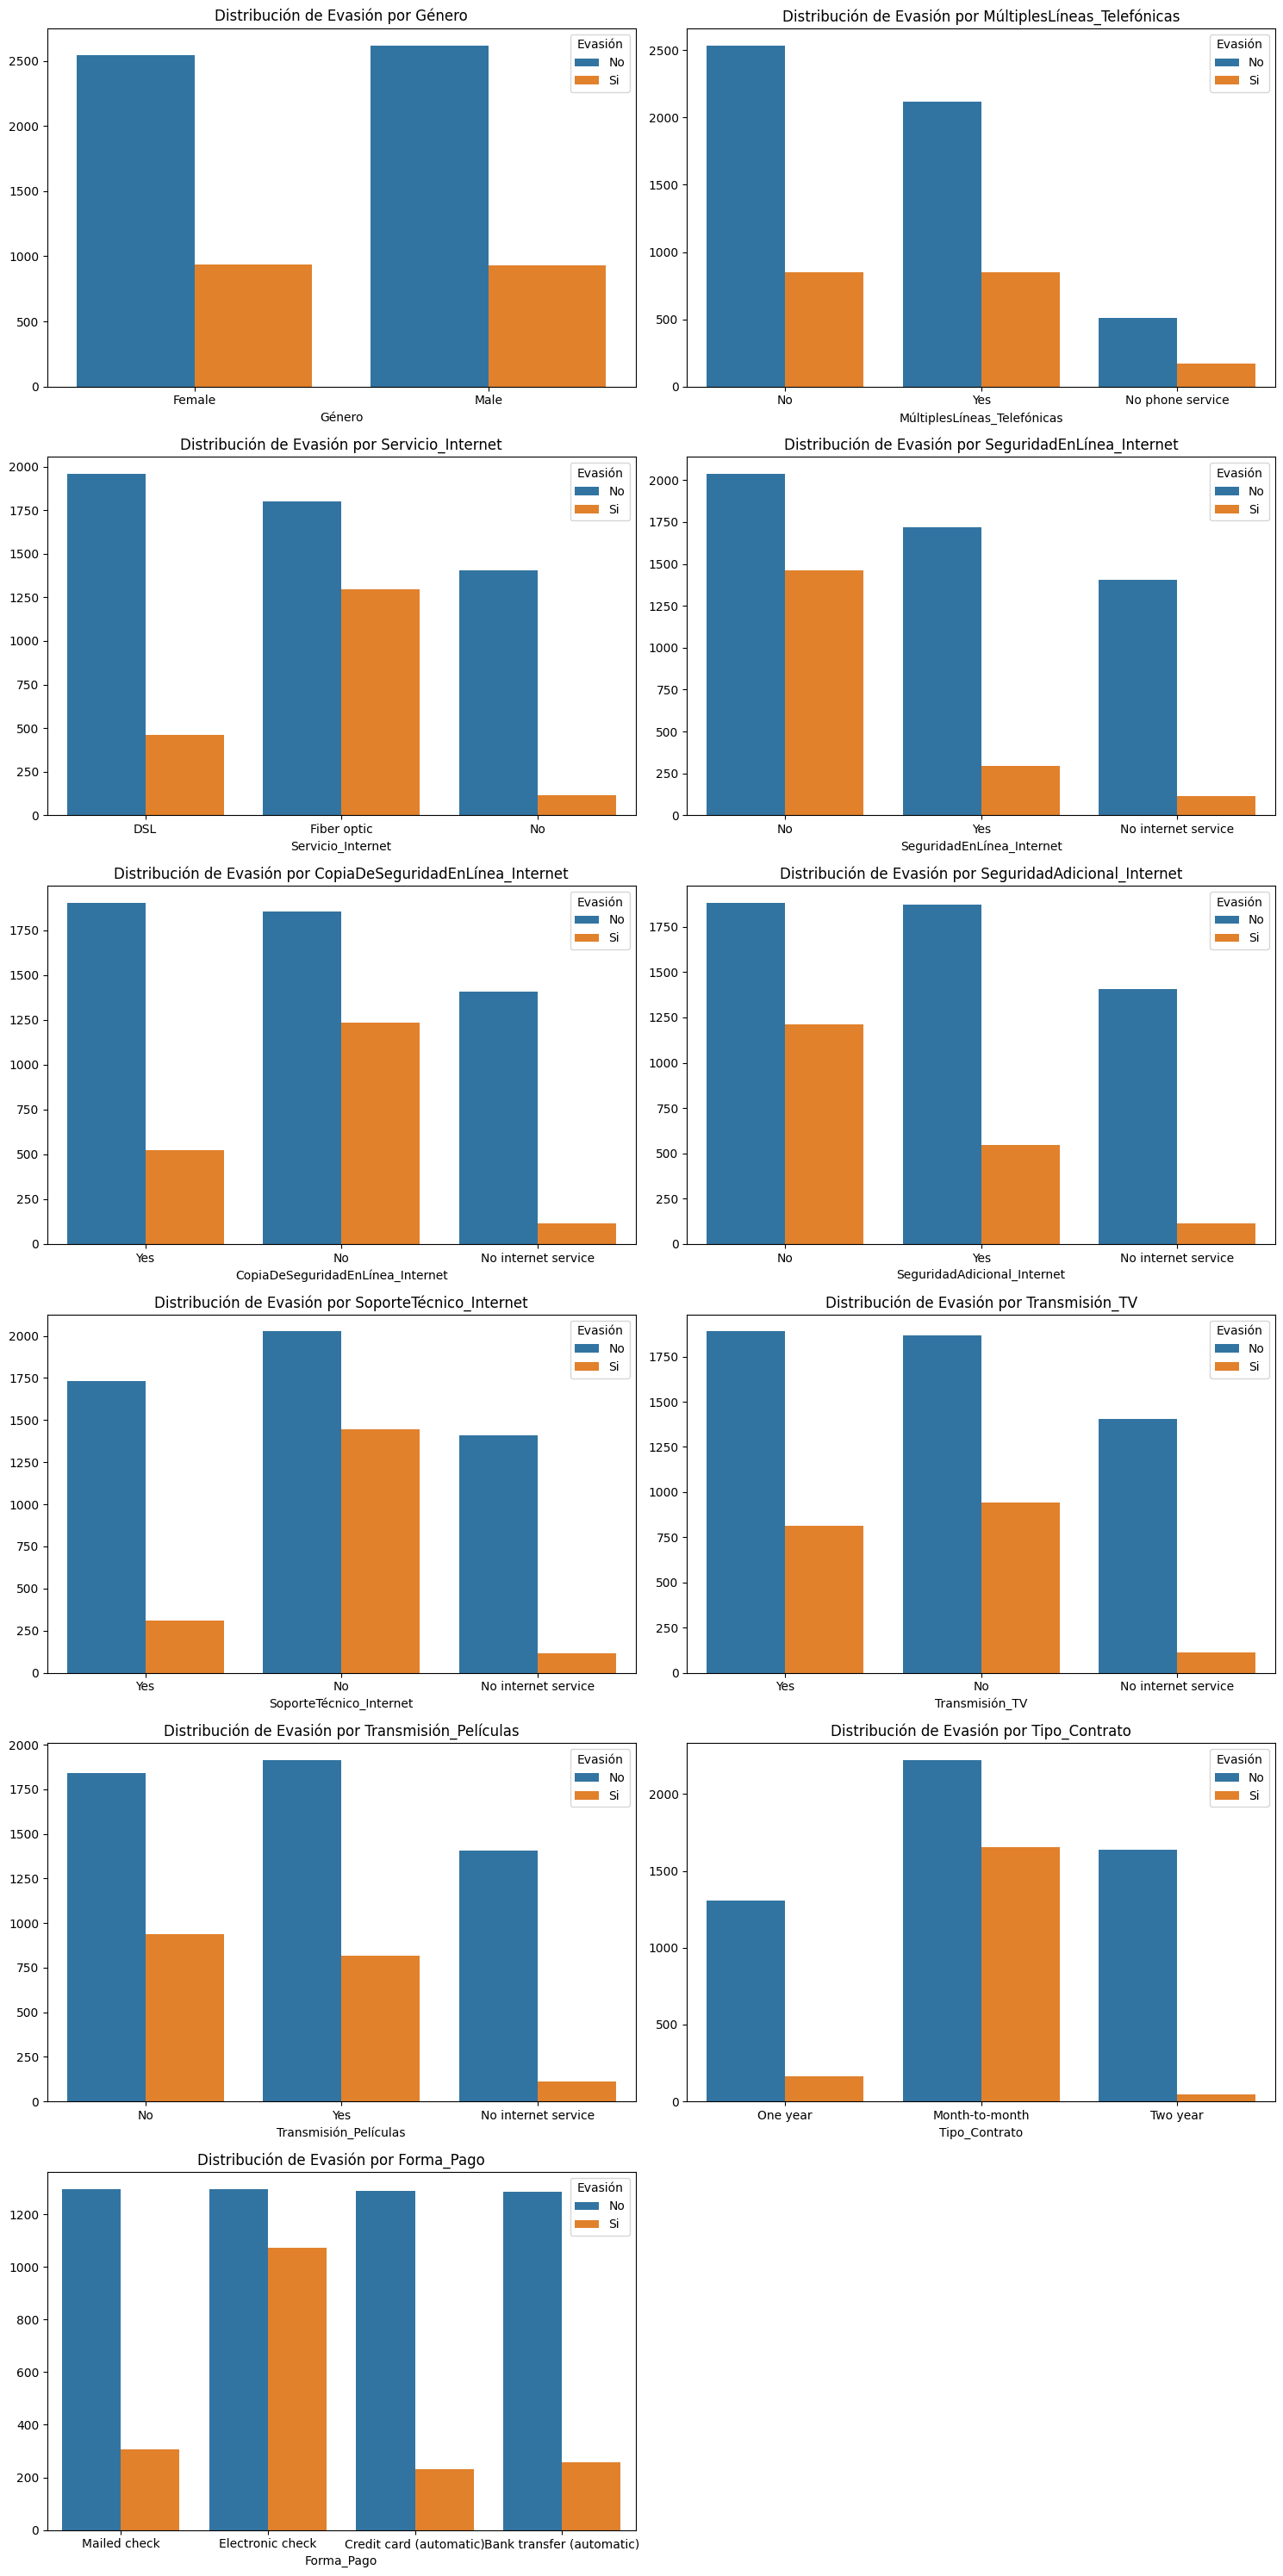

In [356]:
# Determinar el número de filas y columnas para la cuadrícula de subplots
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Aplanar el array 2D de ejes para facilitar la iteración

# Crear un countplot para cada columna categórica
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df_actual, x=col, hue='Evasión', ax=axes[i])
    axes[i].set_title(f'Distribución de Evasión por {col}')
    axes[i].set_ylabel('')

# Ocultar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###Conteo de evasión por variables numéricas

In [357]:
# Obtener las columnas con tipo de dato 'object' (generalmente categóricas)
numerical_columns = df_actual.select_dtypes(include='float64').columns.tolist()

# Excluir columnas que no son categóricas para el análisis (como ID y la variable objetivo)
columns_to_exclude = ['ID_Cliente']
numerical_columns = [col for col in numerical_columns if col not in columns_to_exclude]

print("Columnas numericas:")
print(numerical_columns)

Columnas numericas:
['Cuentas_Mensuales', 'Cuentas_Totales', 'Cuentas_Diarias']


In [358]:
numerical_cols = ['Meses_Contrato', 'Cuentas_Mensuales', 'Cuentas_Totales', 'Cuentas_Diarias']

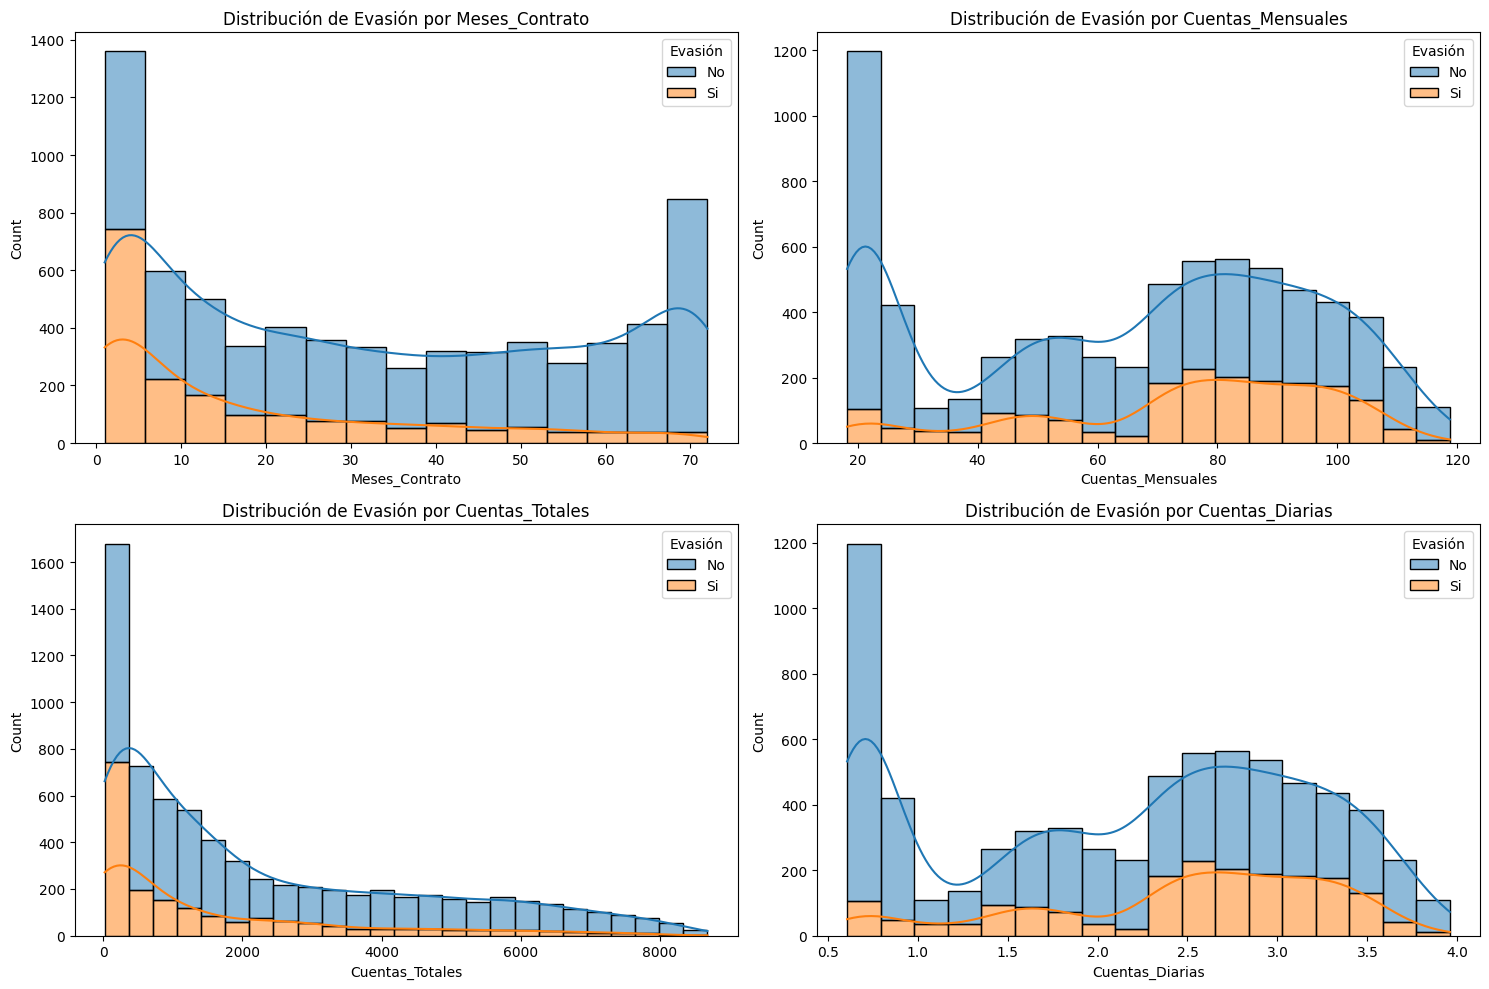

In [359]:
numerical_cols = ['Meses_Contrato', 'Cuentas_Mensuales', 'Cuentas_Totales', 'Cuentas_Diarias']
# Determinar el número de filas y columnas para la cuadrícula de subplots
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Aplanar el array 2D de ejes para facilitar la iteración

# Crear un histograma para cada columna numérica
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_actual, x=col, hue='Evasión', multiple='stack', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribución de Evasión por {col}')

# Ocultar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [360]:
for col in numerical_cols:
    fig = px.box(df_actual, x='Evasión', y=col, color='Evasión',
                 title=f'Distribución de {col} por Evasión')
    fig.update_layout(width = 1000,height = 800)
    fig.show()

In [361]:
for col in numerical_cols:
    fig = px.histogram(df_actual, x=col, color='Evasión', marginal='box',
                       title=f'Distribución de Evasión por {col}')
    fig.update_layout(barmode='overlay', width = 1000)
    fig.show()

In [362]:
# Calcular la tasa de evasión por Meses_Contrato
# Agrupar por Meses_Contrato y Evasión, contar ocurrencias y normalizar
churn_rate_by_tenure = df_actual.groupby('Meses_Contrato')['Evasión'].value_counts(normalize=True).unstack().fillna(0)

# Seleccionar la tasa de evasión ('Si') y resetear el índice para usar Meses_Contrato como columna
churn_rate_by_tenure = churn_rate_by_tenure['Si'].reset_index()
churn_rate_by_tenure = churn_rate_by_tenure.rename(columns={'Si': 'Tasa de Evasión'})


# Crear el gráfico de línea
fig = px.line(churn_rate_by_tenure, x='Meses_Contrato', y='Tasa de Evasión', markers=True,
              title='Tasa de Evasión por Meses de Contrato')

fig.update_layout(xaxis_title='Meses de Contrato', yaxis_title='Tasa de Evasión', width = 1000)
fig.show()

###Análisis de correlación entre variables

In [363]:
df_clean = df_actual.copy()

In [364]:
df_clean['Evasión'] = df_clean['Evasión'].map({'No':0,'Si':1})

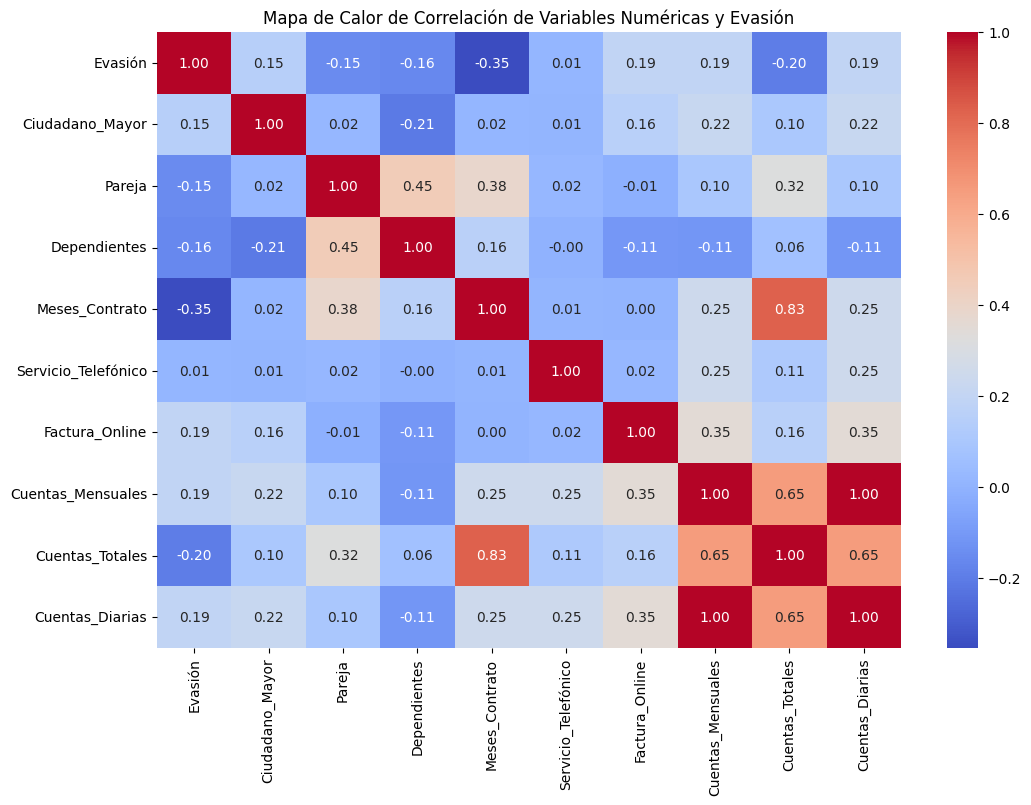

In [365]:
# Seleccionar solo las columnas numéricas (incluyendo 'Evasión' si ya está codificada numéricamente)
# Asegurarse de que 'Evasión' es numérica (0 o 1)
df_numeric = df_clean.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación de Variables Numéricas y Evasión')
plt.show()

##🔹 Conclusiones e Insights

1. Riesgo concentrado en contratos mes a mes: Los clientes con contratos mes a mes tienen una tasa de evasión significativamente más alta en comparación con aquellos con contratos de uno o dos años. Esto sugiere que la falta de compromiso a largo plazo es un factor importante.

2. Antigüedad del Cliente (Tenure): La probabilidad de que un cliente cancele es particularmente alta durante los primeros meses de servicio. A medida que la antigüedad aumenta, la tasa de evasión tiende a disminuir. Esto resalta la importancia de las estrategias de retención temprana.

3. Servicio de Internet: Los clientes con servicio de internet de fibra óptica (Fiber optic) muestran una mayor tasa de evasión en comparación con otros tipos de servicio de internet o aquellos sin servicio de internet, lo que sugiere problemas de experiencia (instalación, calidad o expectativas).

4. Método de Pago: Los métodos de pago, especialmente el cheque electrónico (Electronic check), parecen estar asociados con una mayor evasión en comparación con los pagos automáticos (transferencia bancaria o tarjeta de crédito).

5. Servicios Adicionales: Los clientes que contratan servicios adicionales como seguridad en línea, copia de seguridad, protección de dispositivos, soporte técnico, streaming de TV y películas, tienden a tener una menor probabilidad de cancelar. Cuantos más servicios adicionales tiene un cliente, es menos probable que se vaya. Estos servicios actúan como "factores de fidelización"

6. Cargos Mensuales y Totales: Los clientes con cargos mensuales más altos, especialmente aquellos con contratos a corto plazo, tienden a tener una mayor tasa de evasión. Los cargos totales, como era de esperar, están fuertemente correlacionados con la antigüedad.

📌Las variables que parecen ser más predictivas de la evasión incluyen el tipo de contrato, la antigüedad, el tipo de servicio de internet (fibra óptica), el método de pago (cheque electrónico) y la cantidad de servicios adicionales contratados.

##🔹 Recomendaciones

1. Fomentar Contratos a Largo Plazo: Incentivar a los clientes a optar por contratos de uno o dos años mediante descuentos o beneficios adicionales. Esto podría aumentar la retención de clientes al requerir un compromiso más prolongado.
2. Implementar Estrategias de Retención Temprana: Dado que la tasa de evasión es alta en los primeros meses, es crucial implementar programas de incorporación y seguimiento activo para los nuevos clientes. Esto podría incluir soporte técnico proactivo, comunicación personalizada y ofertas especiales para asegurar una experiencia positiva inicial.
3. Mejorar la Experiencia del Servicio de Fibra Óptica: Investigar las causas de la mayor evasión entre los usuarios de fibra óptica. Esto podría implicar mejorar la calidad de la instalación, la estabilidad del servicio o gestionar mejor las expectativas del cliente sobre el rendimiento.
4. Promover Métodos de Pago Automáticos: Alentar a los clientes a utilizar métodos de pago automáticos (tarjeta de crédito o transferencia bancaria) en lugar de cheques electrónicos, posiblemente ofreciendo pequeños incentivos.
5. Destacar el Valor de los Servicios Adicionales: Comunicar activamente a los clientes los beneficios de los servicios adicionales (seguridad en línea, copia de seguridad, etc.) y considerar la posibilidad de empaquetar servicios para aumentar la adopción. Esto puede aumentar la "fidelización" del cliente.
6. Ofrecer Planes de Precios Flexibles o Revisar la Estructura de Cargos: Para clientes con altos cargos mensuales, especialmente aquellos con contratos a corto plazo, considerar opciones de planes más flexibles o revisar la estructura de precios para ser más competitivos y transparentes.